https://stackoverflow.com/questions/43769068/jupyter-notebook-widget-javascript-not-detected

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [2]:
import sys
import os
import json
import argparse
import math
sys.path.append("../")
import logging
logger = logging.getLogger(__name__)

In [3]:
from dhira.data.features.image_feature import ImageFeature
from dhira.tf.models.conv.cifiar_convnet import Cifiar10ConvNet
from dhira.data.data_manager import DataManager
from dhira.data.dataset.cifiar10 import Cifiar10

In [4]:
cifiar = Cifiar10()

--- Logging error ---
Traceback (most recent call last):
  File "/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/mageswarand/anaconda3/envs/tensorflow1.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mageswarand


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


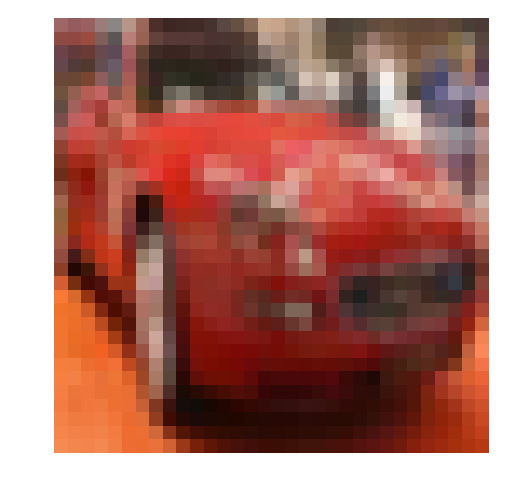

In [5]:
cifiar.display_stats(1,5)

In [6]:
data_manager = DataManager(cifiar)

In [7]:
get_train_data_gen, train_data_size = data_manager.get_train_data()
print('Training data size: ', train_data_size)

INFO:dhira.data.dataset.internal.dataset_base:cifiar10-train.p already exists


Training data size:  45000


In [8]:
get_val_data_gen, val_data_size = data_manager.get_validation_data()
print('Validation data size: ', val_data_size)

INFO:dhira.data.dataset.internal.dataset_base:cifiar10-val.p already exists


Validation data size:  5000


In [9]:
get_test_data_gen, test_data_size = data_manager.get_test_data()
print('Test data size: ', test_data_size)

INFO:dhira.data.dataset.internal.dataset_base:cifiar10-test.p already exists


Test data size:  10000


In [17]:
batch_size = 128
num_epochs = 10
num_train_steps_per_epoch = int(math.ceil(train_data_size / batch_size))
num_val_steps = int(math.ceil(val_data_size / batch_size))
print('Number of train steps {}/{} and validation steps {}/{} for batch size {}'.format(num_train_steps_per_epoch,
                                                                                        train_data_size,
                                                                                        num_val_steps,
                                                                                        val_data_size,
                                                                                        batch_size))

log_period = 10
val_period = num_train_steps_per_epoch//1.8
save_period = num_train_steps_per_epoch//1.8
val_period

In [18]:
model = Cifiar10ConvNet(name='Cifiar10ConvNet', save_dir='../models/', log_dir='../logs/', run_id='0',
                 image_shape=[32,32,3], keep_prop_value=0.5)


INFO:dhira.tf.models.internal.base_tf_model:Writing logs to ../logs/Cifiar10ConvNet/001503127127/
INFO:dhira.tf.models.internal.base_tf_model:log path ../logs/Cifiar10ConvNet/001503127127/ does not exist, creating it


In [19]:
model.compile()

INFO:dhira.tf.models.internal.base_tf_model:Writing params to ../logs/Cifiar10ConvNet/001503127127/Cifiar10ConvNetparams.json
INFO:dhira.tf.models.internal.base_tf_model:Building graph...
INFO:dhira.tf.models.conv.cifiar_convnet:in_tensor: (?, 32, 32, 3)
INFO:dhira.tf.models.conv.cifiar_convnet:Creating conv2d_maxpool layer
INFO:dhira.tf.models.conv.cifiar_convnet:   ---> conv layer: (?, 32, 32, 16)
INFO:dhira.tf.models.conv.cifiar_convnet:   ---> max pool layer: (?, 16, 16, 16)
INFO:dhira.tf.models.conv.cifiar_convnet:conv1 layer: (?, 16, 16, 16)
INFO:dhira.tf.models.conv.cifiar_convnet:conv1_dropout layer: (?, 16, 16, 16)
INFO:dhira.tf.models.conv.cifiar_convnet:Creating conv2d_maxpool layer
INFO:dhira.tf.models.conv.cifiar_convnet:   ---> conv layer: (?, 16, 16, 32)
INFO:dhira.tf.models.conv.cifiar_convnet:   ---> max pool layer: (?, 8, 8, 32)
INFO:dhira.tf.models.conv.cifiar_convnet:conv2 layer: (?, 8, 8, 32)
INFO:dhira.tf.models.conv.cifiar_convnet:flatten layer: (?, 2048)
INFO:dh

In [20]:
model.train(get_train_feature_generator=get_train_data_gen,
                get_val_feature_generator=get_val_data_gen,
                batch_size=batch_size,
                num_train_steps_per_epoch=num_train_steps_per_epoch,
                num_epochs=num_epochs,
                num_val_steps=num_val_steps,
                log_period=log_period,
                val_period=val_period,
                save_period=save_period,
                patience=patience)

Writing to /opt/dhira/logs/Cifiar10ConvNet/001503127127

--------------------------------------------------

tensorboard --logdir  /opt/dhira/logs/Cifiar10ConvNet/001503127127

tensorboard --logdir  /opt/dhira/models/Cifiar10ConvNet/00/checkpoints --port 6007
--------------------------------------------------


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-200


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-352


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-400


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-600


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-704


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-800


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1000
INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1056


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1200


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1400
INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1408


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1600


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1760


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-1800


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2000


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2112


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2200


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2400
INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2464


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2600


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2800
INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-2816


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-3000


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-3168


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-3200


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-3400


INFO:dhira.tf.models.internal.base_tf_model:Saving final model @ /opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-3520


INFO:dhira.tf.models.internal.base_tf_model:Finished 10 epochs!


'/opt/dhira/models/Cifiar10ConvNet/00/Cifiar10ConvNet-3520'

In [21]:
single_image = DataManager.get_random_feature(get_test_data_gen, test_data_size)

In [22]:
pred = model.predict(single_image)

INFO:dhira.tf.models.internal.base_tf_model:Model is lodded from ../models/Cifiar10ConvNet/00/
INFO:dhira.tf.models.internal.base_tf_model:Getting latest checkpoint in ../models/Cifiar10ConvNet/00/
INFO:dhira.tf.models.internal.base_tf_model:Attempting to load checkpoint at ../models/Cifiar10ConvNet/00/Cifiar10ConvNet-3520


INFO:tensorflow:Restoring parameters from ../models/Cifiar10ConvNet/00/Cifiar10ConvNet-3520


INFO:tensorflow:Restoring parameters from ../models/Cifiar10ConvNet/00/Cifiar10ConvNet-3520
INFO:dhira.tf.models.internal.base_tf_model:Successfully loaded ../models/Cifiar10ConvNet/00/Cifiar10ConvNet-3520!


In [23]:
pred

array([[-2.5371201 ,  4.13187551, -2.5559237 , -1.66488409, -4.47724438,
        -1.10693192, -1.81675208, -2.45599127,  2.02726197,  0.0231819 ]], dtype=float32)

In [ ]:
# cifiar.display_image_predictions(single_image[0][0], pred, single_image[1][0])